loading relevant libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [36]:
the_dir = r'C:\Users\aradg\OneDrive - post.bgu.ac.il'
train_data = os.path.join(the_dir, 'train.csv')
train = pd.read_csv(train_data, nrows=10000000,
                   dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})
train.rename({'acoustic_data':'signal', 'time_to_failure':'earth_time'}, axis='columns', inplace=True)

train.head(10)

,signal,earth_time
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691
5,8,1.4691
6,9,1.4691
7,7,1.4691
8,-5,1.4691
9,3,1.4691


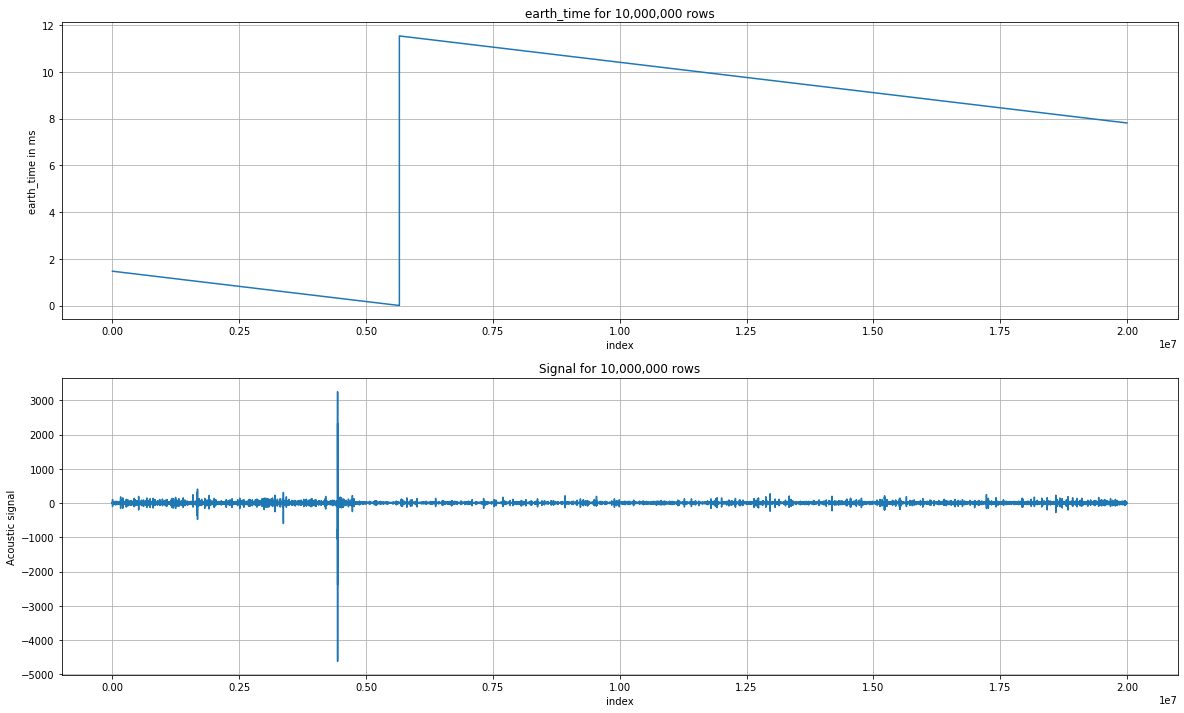

In [34]:
fig, ax = plt.subplots(2,1, figsize=(20,12))
ax[0].plot(train.index.values, train.earth_time.values)
ax[0].set_title('earth_time for 10,000,000 rows')
ax[0].set_xlabel('index')
ax[0].set_ylabel('earth_time in ms')
ax[0].grid()

ax[1].plot(train.index.values, train.signal.values)
ax[1].set_title('Signal for 10,000,000 rows')
ax[1].set_xlabel('index')
ax[1].set_ylabel('Acoustic signal')
ax[1].grid()

closer look

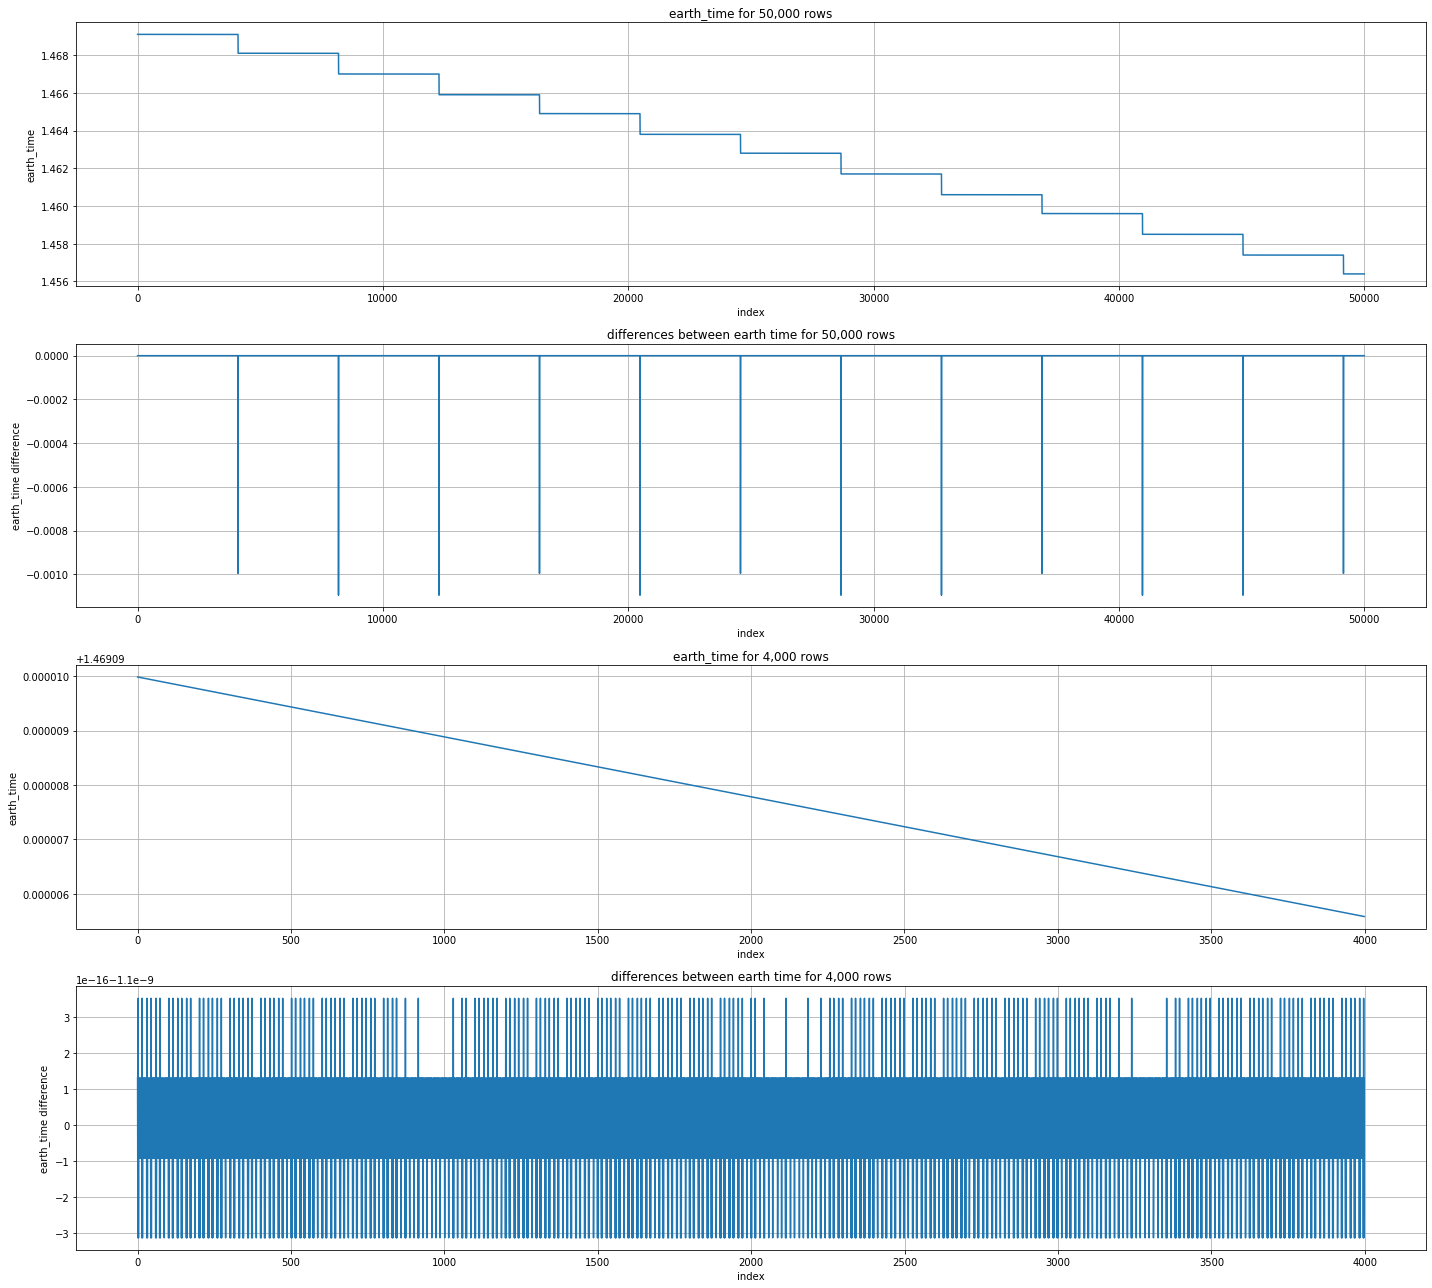

In [21]:
fig, ax = plt.subplots(4,1, figsize=(20,18))
ax[0].plot(train.index.values[0:50000], train.earth_time.values[0:50000])
ax[0].set_ylabel('earth_time')
ax[0].set_xlabel('index')
ax[0].set_title('earth_time for 50,000 rows')
ax[0].grid()
ax[1].plot(train.index.values[0:49999], np.diff(train.earth_time.values[0:50000]))
ax[1].set_ylabel('earth_time difference')
ax[1].set_xlabel('index')
ax[1].set_title('differences between earth time for 50,000 rows')
ax[1].grid()
ax[2].plot(train.index.values[0:4000], train.earth_time.values[0:4000])
ax[2].set_ylabel('earth_time')
ax[2].set_xlabel('index')
ax[2].set_title('earth_time for 4,000 rows')
ax[2].grid()
ax[3].plot(train.index.values[0:3999], np.diff(train.earth_time.values[0:4000]))
ax[3].set_ylabel('earth_time difference')
ax[3].set_xlabel('index')
ax[3].set_title('differences between earth time for 4,000 rows')
ax[3].grid()
fig.tight_layout()

In [22]:
test_path = os.path.join(the_dir,'test')
test_files = os.listdir(test_path)
len(test_files)

2624

In [23]:
sample_submission = pd.read_csv(os.path.join(the_dir, 'sample_submission.csv'))
len(sample_submission)

2624

In [24]:
test_files[0]

'seg_00030f.csv'

the length of each test signal is 150000


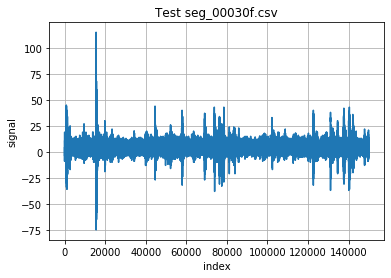

In [32]:
test_0 = pd.read_csv(os.path.join(test_path, test_files[0]))
print(f'the length of each test signal is {len(test_0)}')
plt.plot(test_0.acoustic_data.values)
plt.xlabel('index')
plt.ylabel('signal')
plt.title(f'Test {test_files[0]}')
plt.grid()
